# **Exploratory Data Analysis on Indian Cuisine**

## Objective

The project aims to conduct a comprehensive exploratory data analysis on Indian cuisine to uncover insights into cooking durations, ingredient compositions, and regional variations.

In [31]:
library(tidyverse)
library(data.table)
library(wordcloud)

## 1. Data Collection
This dataset has been downloaded from [Kaggle](https://www.kaggle.com/datasets/nehaprabhavalkar/indian-food-101/data).

In [32]:
food_data = fread('datasets/indian_food.csv', na.strings = "-1", stringsAsFactors=TRUE)
head(food_data)

name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<fct>,<fct>
Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
Ghevar,"Flour, ghee, kewra, milk, clarified butter, sugar, almonds, pistachio, saffron, green cardamom",vegetarian,15,30,sweet,dessert,Rajasthan,West
Gulab jamun,"Milk powder, plain flour, baking powder, ghee, milk, sugar, water, rose water",vegetarian,15,40,sweet,dessert,West Bengal,East
Imarti,"Sugar syrup, lentil flour",vegetarian,10,50,sweet,dessert,West Bengal,East


### 1.1 Structure and Summary of the DataFrame.

In [33]:
str(food_data)

Classes 'data.table' and 'data.frame':	255 obs. of  9 variables:
 $ name          : Factor w/ 255 levels "Adhirasam","Aloo gobi",..: 14 28 72 77 81 88 89 97 99 112 ...
 $ ingredients   : Factor w/ 252 levels "Aloo, tomatoes, mustard oil, bay leaf, cinnamon stick",..: 123 101 36 96 130 213 124 37 132 134 ...
 $ diet          : Factor w/ 2 levels "non vegetarian",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ prep_time     : int  45 80 15 15 15 10 10 10 20 10 ...
 $ cook_time     : int  25 30 60 30 40 50 50 20 30 40 ...
 $ flavor_profile: Factor w/ 4 levels "bitter","sour",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ course        : Factor w/ 4 levels "dessert","main course",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ state         : Factor w/ 24 levels "Andhra Pradesh",..: 24 18 17 18 24 24 22 NA 24 NA ...
 $ region        : Factor w/ 7 levels "","Central","East",..: 3 7 4 7 3 3 4 NA 3 NA ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [34]:
summary(food_data)

                name    
 Adhirasam        :  1  
 Aloo gobi        :  1  
 Aloo matar       :  1  
 Aloo methi       :  1  
 Aloo shimla mirch:  1  
 Aloo tikki       :  1  
 (Other)          :249  
                                                                    ingredients 
 Arbi ke patte, sesame seeds, gur, bengal gram flour, imli                :  2  
 Chhena, sugar, ghee                                                      :  2  
 Gram flour, ghee, sugar                                                  :  2  
 Aloo, tomatoes, mustard oil, bay leaf, cinnamon stick                    :  1  
 Aloo, urad dal, mustard, ginger, curry leaves                            :  1  
 Amaranth leaves, split urad dal, mustard seeds, grated coconut, red chili:  1  
 (Other)                                                                  :246  
             diet       prep_time        cook_time      flavor_profile
 non vegetarian: 29   Min.   :  5.00   Min.   :  2.00   bitter:  4    
 vegetaria

### 1.2 Initial Observations

- The dataset includes both vegetarian and non-vegetarian dishes, with a **larger proportion being vegetarian**.
- Preparation and cooking times span a wide range, with some dishes requiring minimal time and others longer durations.
- Flavor profiles of the dishes vary, with **spicy and sweet flavors being the most common**.
- Dishes are categorized into different courses such as dessert, main course, snack, and starter.
- The dataset covers dishes from various Indian states and regions, with some states and regions being more represented than others.

## 2. Data Preprocessing

### 2.1 Creating List of Ingredients

The data presents the ingredients listed in a single line, separated by commas. To made the process of analysis easier, the functions `get_ingredient_list` and `get_top_ingredient_list` parse those lines and extract the ingredients into a **structured list format**.

In [35]:
get_ingredient_list <- function(x){
    list_ingre <- unlist(lapply(as.character(x), strsplit, ','))
    list_ingre <- tolower(list_ingre)
    list_ingre <- as.data.frame(table(list_ingre))
    list_ingre <- arrange(list_ingre,desc(Freq))
    return(list_ingre)
}

get_top_ingredient_list <- function(x){
    list_ingre <- get_ingredient_list(x)
    list_ingre <- list_ingre[1:20,]
}

all_ingredients <- get_top_ingredient_list(food_data$ingredients)

## 3. Data Exploration

### 3.1 Ingredient WordCloud

WordClouds are used for data exploration because they give instantaneous insights into the most prominent terms, enabling faster comprehension of themes and trends within the dataset.

The code below generates a word cloud where the size and color of each word reflect the frequency of ingredients, presenting a visual depiction of the most prevalent ingredients in the dataset.

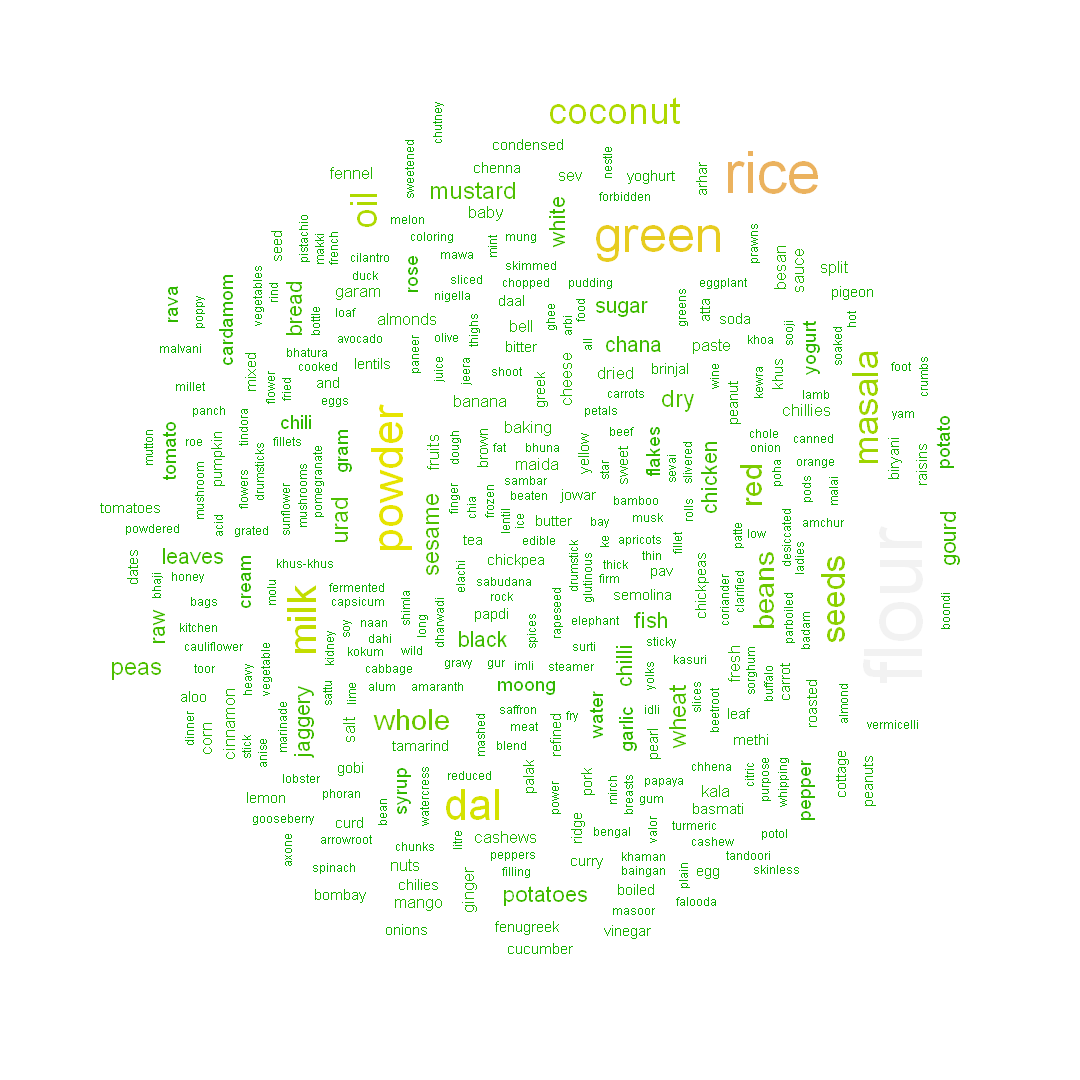

In [36]:
word <- get_ingredient_list(food_data$ingredients)$list_ingre
word <- paste(word, collapse = " ")
res <- unlist(strsplit(word," "))
res <- res[res != ""]
res <- table(res)
word <- names(res)

freq_table <- sapply(res, function(x) round(x/sum(res), 5))

options(repr.plot.width=9, repr.plot.height=9)
wordcloud(word, freq_table, scale=c(4,.5), 
           random.order=TRUE,rot.per=.5, col=terrain.colors(length(res) , alpha=1))

The WordCloud offers a overall glimpse into the ingredients commonly used in Indian cuisine. Notably, **flour**, **powder**, **rice**, **masala**, **coconut**, and **dal** emerge prominently.

### 3.2 Cooking and Preparation Time

Histogram representation of `prep_time`.

Warning message:
"Removed 30 rows containing non-finite outside the scale range (`stat_bin()`)."


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   5.00   10.00   10.00   35.39   20.00  500.00      30 

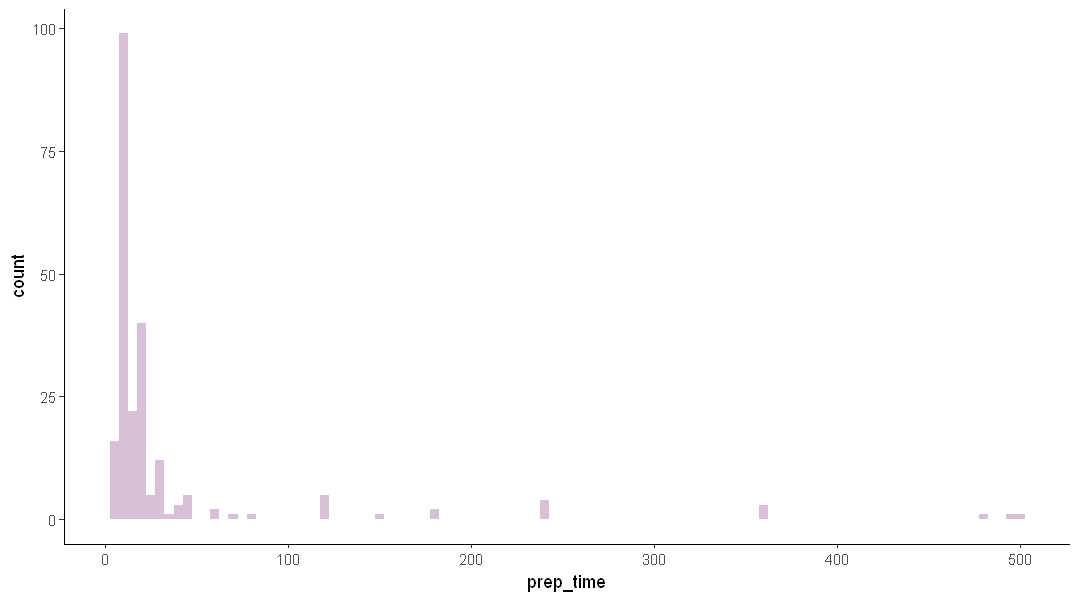

In [37]:
options(repr.plot.width=9, repr.plot.height=5)
ggplot(food_data, aes(x=prep_time))+geom_histogram(binwidth=5, fill="#D8BFD8")+theme_classic()
summary(food_data$prep_time)

In [38]:
# a look at the dishes that have prep time above 300
food_data[prep_time>300]

name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<fct>,<fct>
Misti doi,"Milk, jaggery",vegetarian,480,30,sweet,dessert,West Bengal,East
Pindi chana,"Fennel, tea bags, tomato, kasuri methi, cinnamon",vegetarian,500,120,spicy,main course,Punjab,North
Dosa,"Chana dal, urad dal, whole urad dal, blend rice, rock salt",vegetarian,360,90,spicy,snack,NA,South
Idli,"Split urad dal, urad dal, idli rice, thick poha, rock salt",vegetarian,360,90,spicy,snack,NA,South
Masala Dosa,"Chana dal, urad dal, potatoes, idli rice, thick poha",vegetarian,360,90,spicy,snack,NA,South
Puttu,"Brown rice flour, sugar, grated coconut",vegetarian,495,40,NA,main course,Kerala,South


Histogram representation of `cook_time`.

Warning message:
"Removed 28 rows containing non-finite outside the scale range (`stat_bin()`)."


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   2.00   20.00   30.00   38.91   45.00  720.00      28 

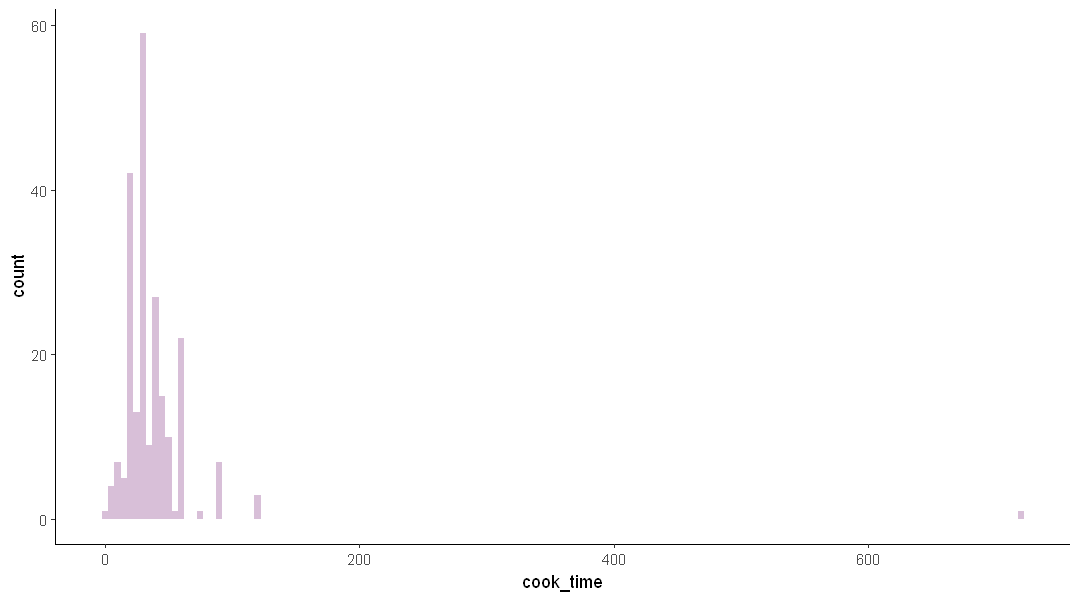

In [39]:
ggplot(food_data, aes(x=cook_time))+geom_histogram(binwidth=5, fill="#D8BFD8")+theme_classic()
summary(food_data$cook_time)

In [40]:
# a look at the dishes that have cook time above 600
food_data[cook_time>600]

name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<fct>,<fct>
Shrikhand,"Curd, sugar, saffron, cardamom",vegetarian,10,720,sweet,dessert,Maharashtra,West


Among the dataset, **75% of dishes demand less than 20 minutes for preparation** and **less than 45 minutes for cooking**. 

However, upon closer inspection of outlier dishes exhibiting exceptionally high preparation or cooking times, a pattern emerges. Dishes with prolonged preparation times also necessitate extended cooking durations, while those with notably lengthy cooking times exhibit surprisingly brief preparation requirements.

### 3.3 Ingredients

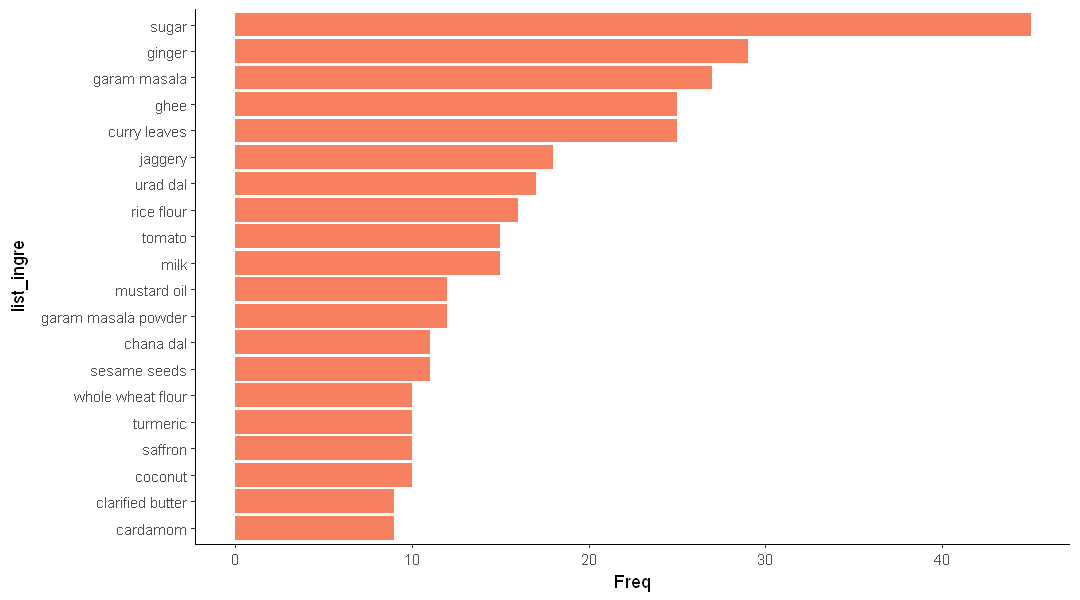

In [41]:
#plotting the 20 most common ingredients used in all dishes
all_ingredients %>%
    mutate(list_ingre = fct_reorder(list_ingre, Freq)) %>%
    ggplot(aes(x=list_ingre, y=Freq))+geom_col(fill="#f68060")+coord_flip()+ theme_classic()

Remarkably, despite the presence of around 50 more spicy dishes than sweet ones, the **most commonly utilized ingredient is sugar**. Following closely behind are ginger and garam masala, renowned spice components, ranking second and third, respectively.

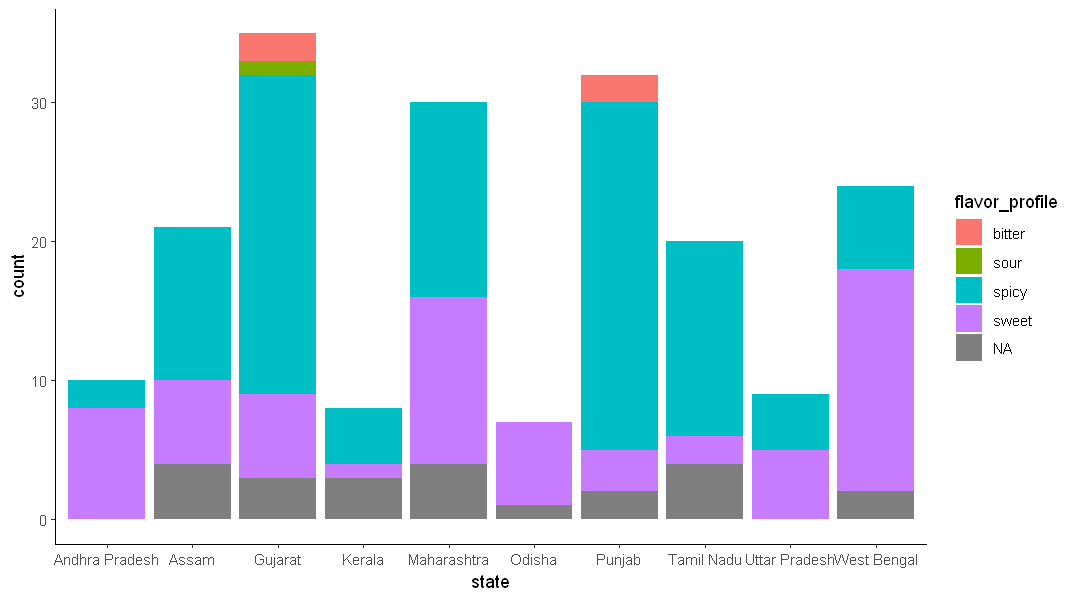

In [42]:
plot <- names(sort(desc(table(food_data$state)))[1:10])
food_data %>%
filter(state %in% plot) %>%
ggplot(aes(x=state))+
    geom_bar(aes(fill=flavor_profile))+
    theme(axis.text.x = element_text(angle=45, hjust=1, vjust=1)) +theme_classic()

Ten states in India collectively account for 83% of the total number of dishes. Overall, several noteworthy features emerge from this analysis.

- Only two states, West Bengal and Andhra Pradesh, exhibit a notably higher number of sweet dishes compared to spicy ones.
- Gujarat stands out as the only state featuring dishes with all four flavor profiles. 
- Punjab follows closely, with dishes spanning three flavor types, making it one of the states with the most varied cuisine offerings.

## 4. Feature Engineering

To delve deeper into their relationship, we need to normalize the time data. This step is essential as `cook_time` does not follow the same distribution as `prep_time`.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
"Removed 2 rows containing non-finite outside the scale range (`stat_smooth()`)."
Warning message:
"Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`)."


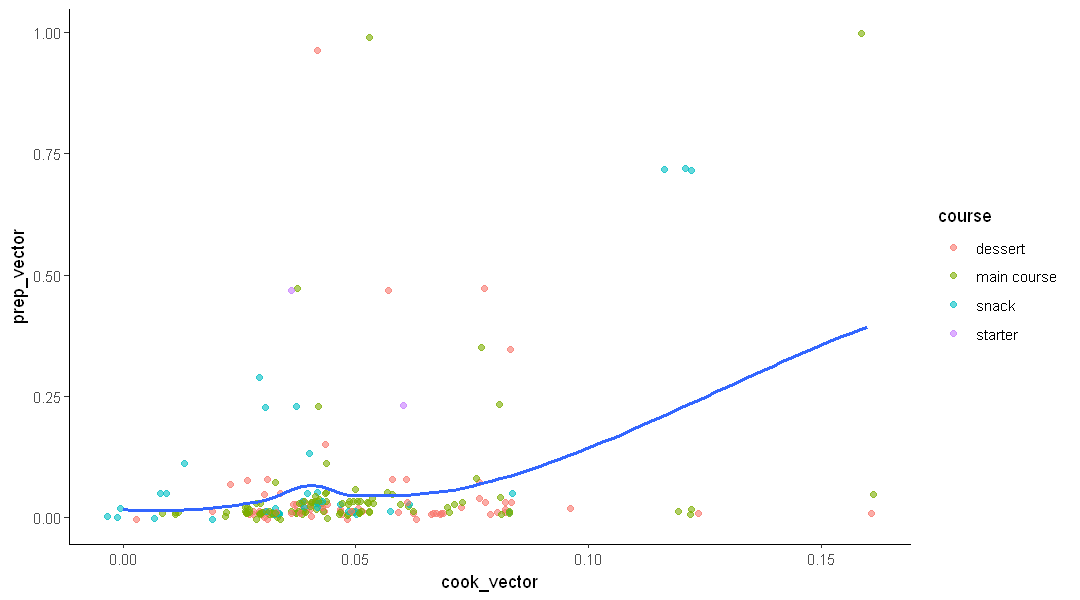

In [43]:
#normalize the cook and prep time 
normalize <- function(vector){
    minimum <- min(vector, na.rm=TRUE)
    maximum <- max(vector, na.rm=TRUE)
    vector <- sapply(vector, function(x) round((x - minimum)/(maximum - minimum),2))
    return(vector)
}

food_data$prep_vector <- normalize(food_data$prep_time)
food_data$cook_vector <- normalize(food_data$cook_time)

ggplot(food_data[cook_vector<0.9], aes(x=cook_vector, y=prep_vector))+geom_jitter(aes(color = course), alpha=0.6)+ geom_smooth(se=FALSE)+theme_classic()

Overall, the relationship between `prepr_time` and `cook_time` reveals two overarching patterns. While some dishes exhibit an increase in preparation time as cooking time lengthens, the majority showcase either minimal preparation for slow cooking or fast cooking. Additionally, dessert dishes tend to cluster around longer cooking times compared to main courses, while snacks demonstrate a notable preparation time.

## 5. Missing Values

Within our dataset, certain values are absent, needing further exploration of inter-variable relationships. To optimize our analysis, it's important to mitigate as many missing values as feasible. Consequently, we will use imputation techniques where applicable to fill the data.

In [44]:
food_data <- food_data[,-c("prep_vector", "cook_vector")]
colSums(is.na(food_data))

name    ingredients           diet      prep_time      cook_time 
             0              0              0             30             28 
flavor_profile         course          state         region 
            29              0             24             13

### 5.1. Imputing Preparation and Cooking Time

For imputation, we will categorize dishes based on similar attributes, which are likely to yield comparable approximate preparation times. Subsequently, we will impute missing values with the median preparation time of each respective group. 

*Given the presence of outlier dishes with notably low cooking or preparation times, resulting in highly skewed distributions, we opt for median imputation over mean imputation for enhanced accuracy.*

Warning message:
"Removed 30 rows containing non-finite outside the scale range
(`stat_density()`)."


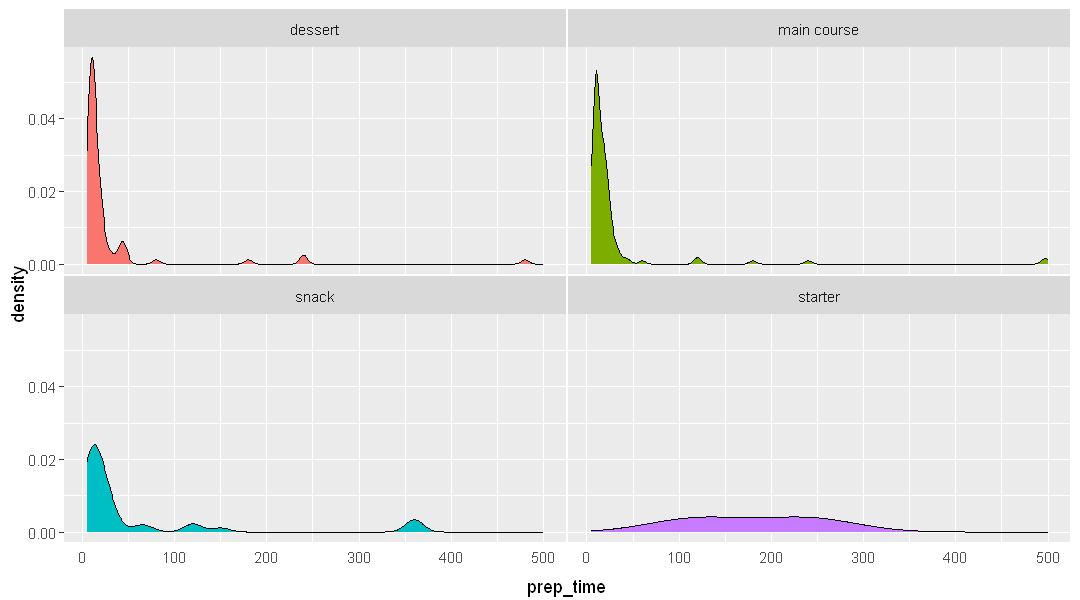

In [45]:
ggplot(data=food_data, aes(x=prep_time, group=course, fill=course)) +
    geom_density(adjust=1.5) +
    facet_wrap(~course) +
    theme(
      legend.position="none",
      panel.spacing = unit(0.1, "lines"),
      axis.ticks.x=element_blank()
    )

In [46]:
head(food_data[is.na(prep_time)])

name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<fct>,<fct>
Sohan papdi,"Gram flour, ghee, sugar, milk, cardamom",vegetarian,NA,60,sweet,dessert,Maharashtra,West
Chhena kheeri,"Chhena, sugar, milk",vegetarian,NA,60,sweet,dessert,Odisha,East
Pork Bharta,"Boiled pork, onions, chillies, ginger and garlic",non vegetarian,NA,NA,spicy,main course,Tripura,North East
Kaara kozhambu,"Sesame oil, drumstick, tamarind paste, sambar powder, tomato",vegetarian,NA,NA,spicy,main course,Tamil Nadu,South
Keerai masiyal,"Urad dal, curry leaves, sugar, mustard seeds, spinach",vegetarian,NA,NA,spicy,main course,Tamil Nadu,South
Paravannam,"Raw rice, jaggery, milk",vegetarian,NA,NA,spicy,main course,Kerala,South


Achieves comparable outcomes to manual processes, but with increased efficiency.

In [47]:
library(simputation)
food_data<- impute_median(food_data, prep_time ~ flavor_profile+course)
food_data$prep_time <- as.numeric(food_data$prep_time)

Next, we employ the same imputation methodology for cooking time as we did for preparation time.

In [48]:
food_data<- impute_median(food_data, cook_time ~ flavor_profile+course)
food_data$cook_time <- as.numeric(food_data$cook_time)

### 5.2 Imputing Flavor Profile Column

Conducting a thorough exploration of the data to facilitate imputation for missing values in this column. The objective is to identify the most commonly occurring ingredients associated with each flavor profile and inferring the flavor type for the respective dishes

In [49]:
food_data$flavor_profile<-as.character(food_data$flavor_profile)

spicy_ingre <- food_data[flavor_profile=="spicy"]
spicy_ingre <- get_top_ingredient_list(spicy_ingre$ingredients)

sweet_ingre <- food_data[flavor_profile == "sweet"]
sweet_ingre <- get_top_ingredient_list(sweet_ingre$ingredients)

bitter_ingre <- food_data[flavor_profile=="bitter"]
bitter_ingre <- get_top_ingredient_list(bitter_ingre$ingredients)

sour_ingre <- food_data[flavor_profile=="sour"]
sour_ingre <- get_top_ingredient_list(sour_ingre$ingredients)

In [50]:
na_flavor <- food_data[is.na(flavor_profile)]
na_flavor_ingre <- get_top_ingredient_list(na_flavor$ingredients)
head(na_flavor_ingre) 

,list_ingre,Freq
,<fct>,<int>
1,curry leaves,8
2,olive oil,4
3,curd,3
4,mustard oil,3
5,mustard seeds,3
6,tamarind,3


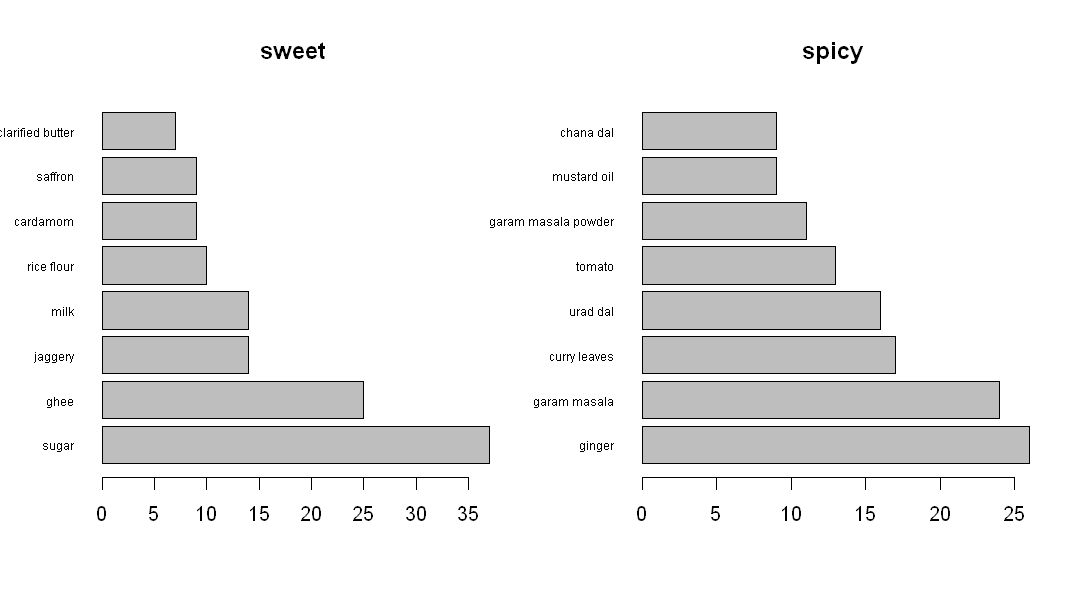

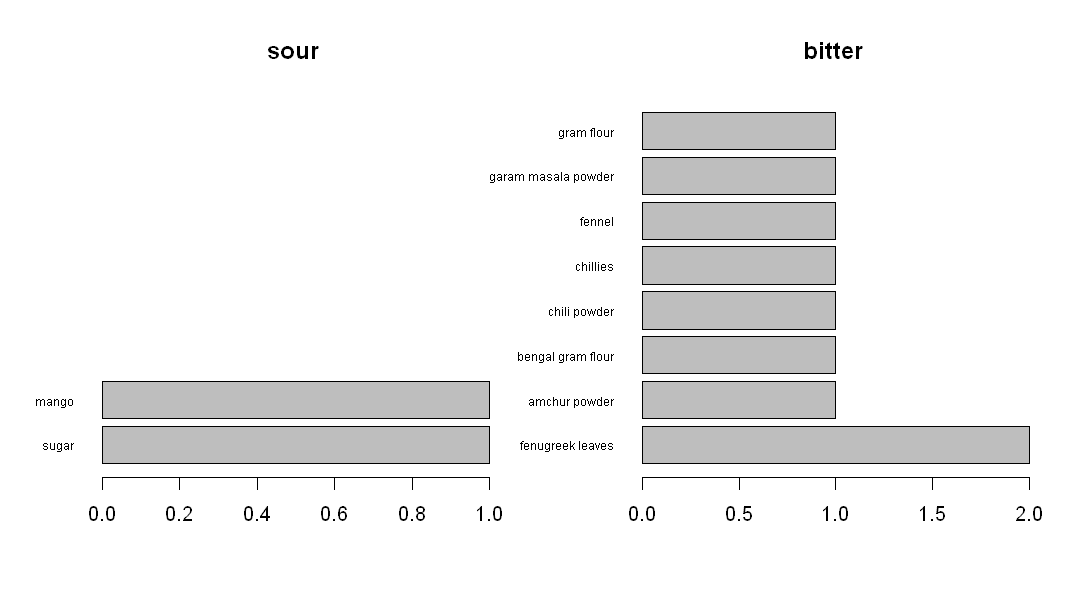

In [51]:
par(mfrow=c(1,2))

barplot(height=sweet_ingre$Freq[1:8],name= sweet_ingre$list_ingre[1:8],horiz=T, las=1, cex.names=.6, main="sweet")
barplot(height=spicy_ingre$Freq[1:8],name= spicy_ingre$list_ingre[1:8],horiz=T, las=1, cex.names=.6, main="spicy")
barplot(height=sour_ingre$Freq[1:8],name= sour_ingre$list_ingre[1:8],horiz=T, las=1, cex.names=.6, main="sour")
barplot(height=bitter_ingre$Freq[1:8],name= bitter_ingre$list_ingre[1:8],horiz=T, las=1, cex.names=.6, main="bitter")

# The last argument allows the change of the orientation of the axis labels:
# 0: always parallel to the axis
# 1: always horizontal
# 2: always perpendicular to the axis
# 3: always vertical.

In [52]:
head(food_data[is.na(flavor_profile)])

name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
<fct>,<fct>,<fct>,<dbl>,<dbl>,<chr>,<fct>,<fct>,<fct>
Chapati,"Whole wheat flour, olive oil, hot water, all purpose flour",vegetarian,10,10,NA,main course,Maharashtra,West
Naan,"Whole wheat flour, honey, butter, garlic",vegetarian,60,30,NA,main course,Punjab,North
Rongi,"Garam masala powder, tomato, kasuri methi, cinnamon, mustard oil",vegetarian,10,30,NA,main course,Punjab,North
Kanji,"Carrot, yellow mustard, red chilli, black salt",vegetarian,10,45,NA,snack,Kerala,South
Pachadi,"Coconut oil, cucumber, curd, curry leaves, mustard seeds",vegetarian,10,25,NA,main course,NA,South
Paniyaram,"Yogurt, ginger, curry leaves, baking soda, green chilli",vegetarian,10,20,NA,main course,Tamil Nadu,South


Observing that the majority of dishes are categorized as having either spicy or sweet flavors. As previously analyzed, many dishes with missing flavor information contain curry leaves as an ingredient, leading us to impute their flavors as spicy.

In [53]:
is_flavor<- function(x, string){
    lists<-get_top_ingredient_list(x)
    lists<-as.character(lists$list_ingre)
    lists<- lists[!is.na(lists)]
    if(any(lists %in% string)){
        return(TRUE)
    }else {
        return(FALSE)
    }
    
}

#sweet flavor
food_data$is_sweet<-sapply(food_data$ingredients, is_flavor, sweet_ingre$list_ingre)
food_data[is.na(flavor_profile) & is_sweet ==T]$flavor_profile <- "sweet"

#spicy flavor
food_data$is_spicy<-sapply(food_data$ingredients, is_flavor, spicy_ingre$list_ingre)
food_data[is.na(flavor_profile) & is_spicy ==T]$flavor_profile <- "spicy"

In [54]:
food_data[is.na(flavor_profile)][c(1,3,8),]$flavor_profile <- "spicy"
food_data[is.na(flavor_profile)]$flavor_profile <- "sweet"
colSums(is.na(food_data))

name    ingredients           diet      prep_time      cook_time 
             0              0              0              5              5 
flavor_profile         course          state         region       is_sweet 
             0              0             24             13              0 
      is_spicy 
             0

### 5.3 Imputing State and Region

Transitioning from food-related variables to geographical ones, upon examining the data, we notice that certain dishes, like rice, have missing values in their region/state attribute. These dishes may not be exclusively associated with any particular region/state but instead span across multiple states/regions. Hence, it seems logical to assign values indicating this broader categorization for the purpose of analysis.

In [55]:
food_data$state <- factor(food_data$state, levels = c(levels(food_data$state), "multiple states"))
levels(food_data$state)

[1] "Andhra Pradesh"  "Assam"           "Bihar"           "Chhattisgarh"   
 [5] "Goa"             "Gujarat"         "Haryana"         "Jammu & Kashmir"
 [9] "Karnataka"       "Kerala"          "Madhya Pradesh"  "Maharashtra"    
[13] "Manipur"         "NCT of Delhi"    "Nagaland"        "Odisha"         
[17] "Punjab"          "Rajasthan"       "Tamil Nadu"      "Telangana"      
[21] "Tripura"         "Uttar Pradesh"   "Uttarakhand"     "West Bengal"    
[25] "multiple states"

In [56]:
food_data[is.na(state)]$state <- "multiple states"

In [57]:
food_data$region <- factor(food_data$region, levels = c(levels(food_data$region), "multiple regions"))
levels(food_data$region)

[1] ""                 "Central"          "East"             "North"           
[5] "North East"       "South"            "West"             "multiple regions"

## 6. Additional Data Exploration

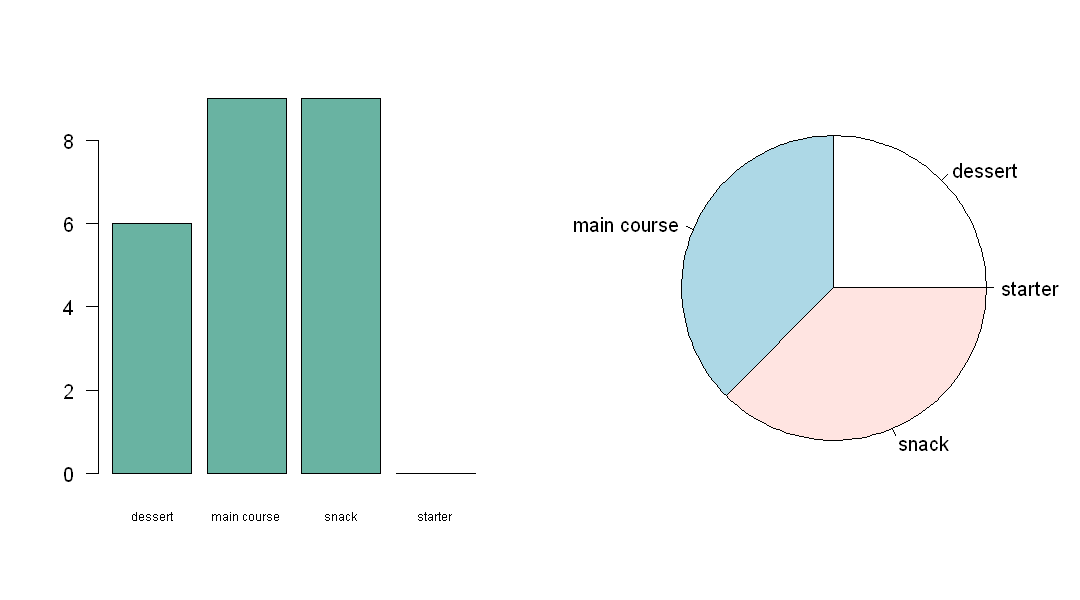

In [58]:
library(repr)
options(repr.plot.width=9, repr.plot.height=5)
par(mfrow=c(1, 2))
barplot(table(food_data[state=="multiple states"]$course), width=5, col="#69b3a2", las=1, cex.names=.6)
pie(table(food_data[state=="multiple states"]$course), radius=2)

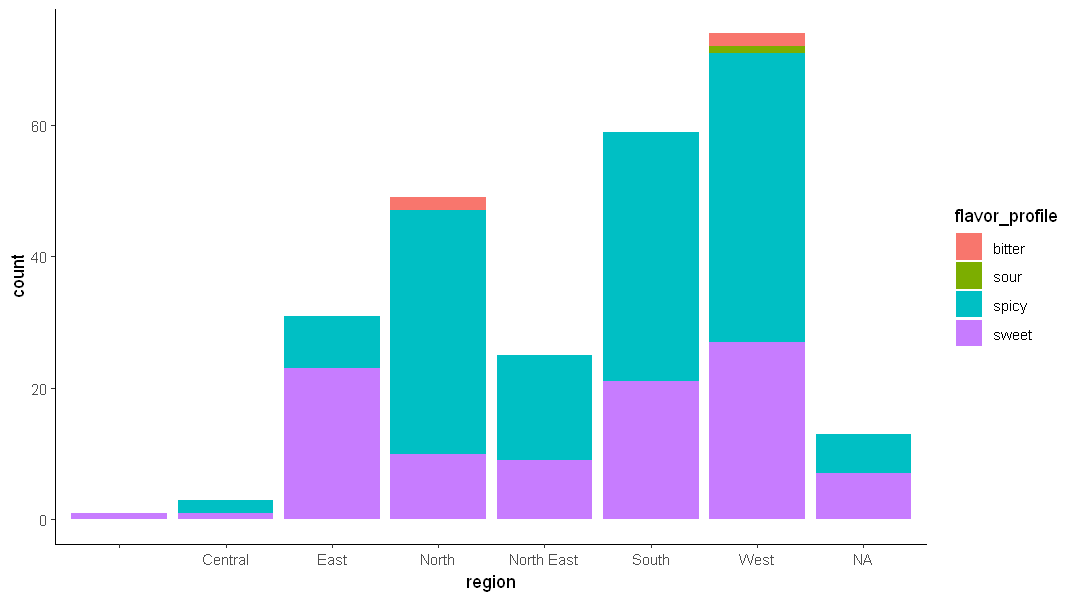

In [59]:
food_data %>%
ggplot(aes(x=region))+
    geom_bar(aes(fill=flavor_profile))+
    theme(axis.text.x = element_text(angle=45, hjust=1, vjust=1))+theme_classic()

At the regional level, spicy flavors significantly outnumber sweet ones. Notably, the North, West, and South regions contribute the highest number of dishes to Indian cuisine.

## 7. Conclusion

Spicy flavors dominate the Indian culinary landscape, with a significant majority of dishes falling under this category. However, certain states, such as West Bengal and Andhra Pradesh, exhibit a higher prevalence of sweet dishes. The North, West, and South regions contribute the most dishes to Indian cuisine. States like Gujarat and Punjab stand out for their diverse cuisine offerings, encompassing a wide range of flavor profiles.

Ingredients play a crucial role in defining flavor profiles, with certain ingredients associated with specific flavor types. For example, curry leaves are often indicative of spicy dishes. While certain dishes are prevalent across multiple states, indicating popular favorites, each state also boasts its unique culinary traditions and specialties. Gujarat, with its diverse range of flavor profiles, exemplifies this culinary richness.

In conclusion, Indian cuisine is characterized by its extensive range of flavors and ingredients. From savory dishes to desserts, Indian culinary offerings provide a diverse array of options for exploration.